In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import math
mat_contents = sio.loadmat('tennis_data.mat')

In [2]:
G = mat_contents['G']
print(mat_contents['G'].shape)
print(G[:5,:])
print(G[0,1])

(1801, 2)
[[1 2]
 [1 3]
 [1 3]
 [1 3]
 [1 3]]
2


In [24]:
namelist = []
for i in range(len(mat_contents['W'])):
    namelist.append(mat_contents['W'][i][0][0])
namelist = np.array(namelist)
print(namelist[:10])
print(len(namelist))

['Rafael-Nadal' 'Juan-Monaco' 'Juan-Martin-Del-Potro' 'Mardy-Fish'
 'Roger-Federer' 'Jo-Wilfried-Tsonga' 'Guillermo-Garcia-Lopez'
 'Florian-Mayer' 'Milos-Raonic' 'Santiago-Giraldo']
107


In [4]:
M=len(namelist); N=len(G)
print(M); print(N)

107
1801


In [5]:
np.random.normal(0,1,1)

array([0.86193457])

In [6]:
pv = .5*np.ones((M,1))
w = np.zeros((M,1))
for i in range(100):
    t = np.nan*np.ones((N,1))
    for g in range(N):
        s = w[G[g,0]-1]-w[G[g,1]-1]
        t[g] = np.random.normal(0,1,1)+s
        while t[g]<0:
            t[g] = np.random.normal(0,1,1)+s
        
    m = np.nan*np.ones((M,1))
    for p in range(M):
        countw = 0; countl = 0
        wlist = []; llist = []
        tmpi,tmpj = np.where(G==p+1)
        for k in range(len(tmpi)):
            if tmpj[k] < 1:
                wlist.append(t[tmpi[k]][0])
                countw+=1
            else:
                llist.append(-t[tmpi[k]][0])
                countl+=1
        m[p] = np.sum(wlist)+np.sum(llist)
    
    iS = np.zeros((M,M))
    for g in range(N):
        players_involved = G[g,:]
        id_win = players_involved[0]-1
        id_lose= players_involved[1]-1
        
        iS[id_win,id_win]+=1; iS[id_lose,id_lose]+=1
        iS[id_win,id_lose]-=1; iS[id_lose,id_win]-=1
        
    iSS = np.diag(1/pv.squeeze())+iS
    iR = np.linalg.cholesky(iSS)
    mu = np.linalg.lstsq(iR.T,np.linalg.lstsq(iR,m)[0])[0]
    w = mu+np.linalg.lstsq(iR,np.random.normal(0,1,(M,1)))[0]

C:\Users\44754\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
C:\Users\44754\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [7]:
val = np.sort(w.squeeze())[::-1]
ids = np.argsort(w.squeeze())[::-1]

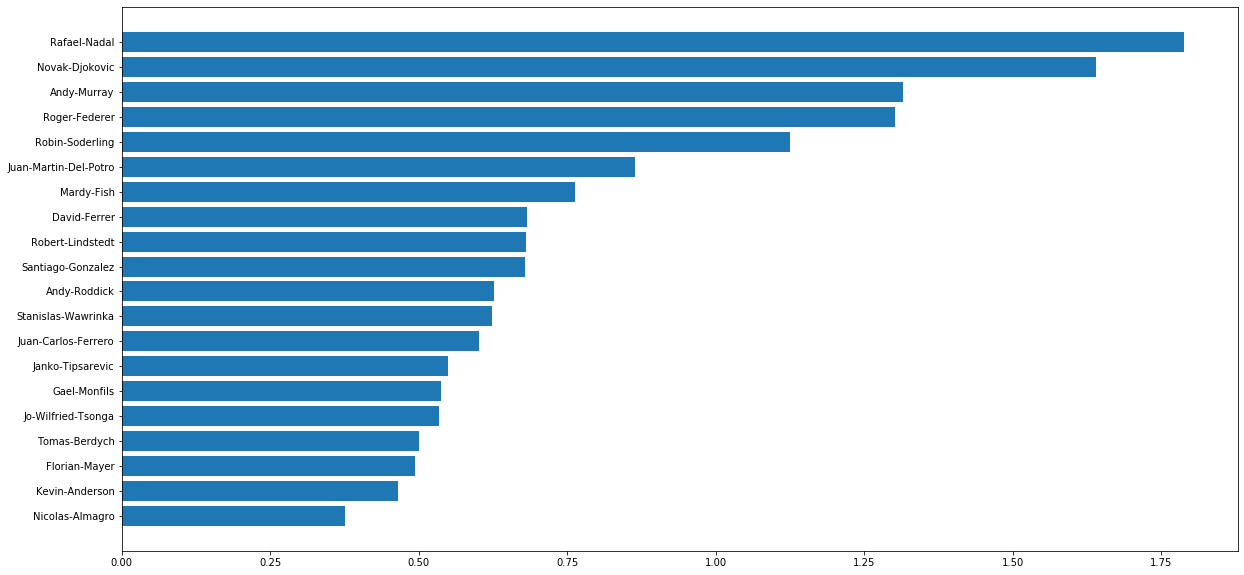

In [27]:
plt.figure(figsize=(20,10))
plt.barh(np.arange(20),val[:20],tick_label=namelist[ids[:20]])
plt.gca().invert_yaxis()